<a href="https://colab.research.google.com/github/mertyunusozer/Aircraft-Sensor/blob/main/Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
file = "/content/drive/MyDrive/Makine_öğrenmesi/train+test+truth.csv"

In [4]:
df = pd.read_csv(file)
df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392.0,2388,100,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392.0,2388,100,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390.0,2388,100,38.95,23.3442,189
3,1,4,0.0007,0.0000,100,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392.0,2388,100,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393.0,2388,100,38.90,23.4044,187


In [5]:
print("Eksik veri sayısı:")
print(df.isnull().sum())

Eksik veri sayısı:
id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
RUL         0
dtype: int64


In [6]:
print("Sabit sütunlar:")
print([col for col in df.columns if df[col].nunique() <= 1])

Sabit sütunlar:
['setting3', 's1', 's18', 's19']


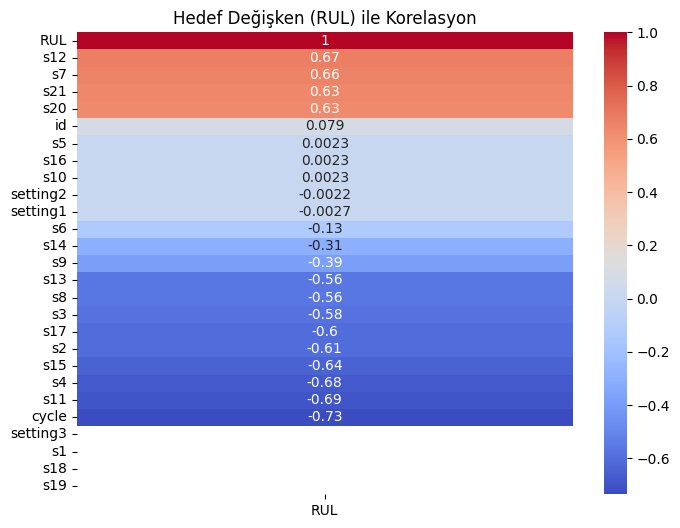

In [7]:
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation[["RUL"]].sort_values("RUL", ascending=False), annot=True, cmap='coolwarm')
plt.title("Hedef Değişken (RUL) ile Korelasyon")
plt.show()

In [8]:
dff = df.drop(columns=["id", "cycle"])

In [9]:
dff.describe()

,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
count,20723.000000,20723.000000,20723.0,2.072300e+04,20723.000000,20723.000000,20723.000000,20723.000000,20723.000000,20723.000000,...,20723.000000,20723.000000,20723.000000,2.072300e+04,20723.000000,20723.0,20723.0,20723.000000,20723.000000,20723.000000
mean,-0.000009,0.000002,100.0,5.186700e+02,642.681353,1590.528617,1408.940733,14.619343,21.609804,553.366752,...,2388.096257,8143.742181,8.442191,3.000000e-02,393.212062,2388.0,100.0,38.816053,23.289562,107.659412
std,0.002188,0.000293,0.0,6.537151e-11,0.499774,6.133752,8.998725,0.094613,0.001388,0.885071,...,0.071920,19.070005,0.037489,1.561609e-14,1.548422,0.0,0.0,0.180670,0.108216,68.819685
min,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.000000,21.600000,549.850000,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,-0.001500,-0.000200,100.0,5.186700e+02,642.330000,1586.270000,1402.370000,14.620000,21.610000,552.810000,...,2388.040000,8133.230000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221650,51.000000
50%,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.110000,1408.040000,14.620000,21.610000,553.440000,...,2388.090000,8140.530000,8.439000,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297700,102.000000
75%,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.390000,1414.560000,14.620000,21.610000,554.010000,...,2388.140000,8148.305000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366600,155.000000
max,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,14.620000,21.610000,556.060000,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [10]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20723 entries, 0 to 20722
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   setting1  20723 non-null  float64
 1   setting2  20723 non-null  float64
 2   setting3  20723 non-null  int64  
 3   s1        20723 non-null  float64
 4   s2        20723 non-null  float64
 5   s3        20723 non-null  float64
 6   s4        20723 non-null  float64
 7   s5        20723 non-null  float64
 8   s6        20723 non-null  float64
 9   s7        20723 non-null  float64
 10  s8        20723 non-null  float64
 11  s9        20723 non-null  float64
 12  s10       20723 non-null  float64
 13  s11       20723 non-null  float64
 14  s12       20723 non-null  float64
 15  s13       20723 non-null  float64
 16  s14       20723 non-null  float64
 17  s15       20723 non-null  float64
 18  s16       20723 non-null  float64
 19  s17       20723 non-null  float64
 20  s18       20723 non-null  in

In [11]:
X = dff.drop(columns=["RUL"])
y = dff["RUL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Skoru: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")

R2 Skoru: 0.5808
MAE: 33.72
MSE: 1908.62
RMSE: 43.69


In [13]:
# Giriş ve hedef ayır
X = dff.drop(columns=["RUL"])
y = dff["RUL"]

# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Skoru (Scaler): {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")

R2 Skoru (Scaler): 0.5808
MAE: 33.72
MSE: 1908.62
RMSE: 43.69


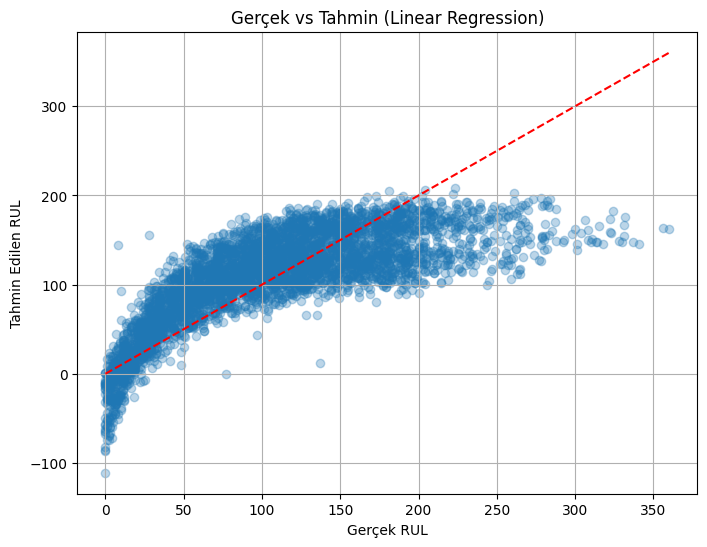

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Gerçek RUL")
plt.ylabel("Tahmin Edilen RUL")
plt.title("Gerçek vs Tahmin (Linear Regression)")
plt.grid(True)
plt.show()

In [16]:
poly_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression()
)

# Eğitim ve test bölmesi
X = dff.drop(columns=["RUL"])
y = dff["RUL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model eğitimi
poly_model.fit(X_train, y_train)
y_pred = poly_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Skoru (Polynomial): {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")

R2 Skoru (Polynomial): 0.6201
MAE: 30.97
MSE: 1729.53
RMSE: 41.59


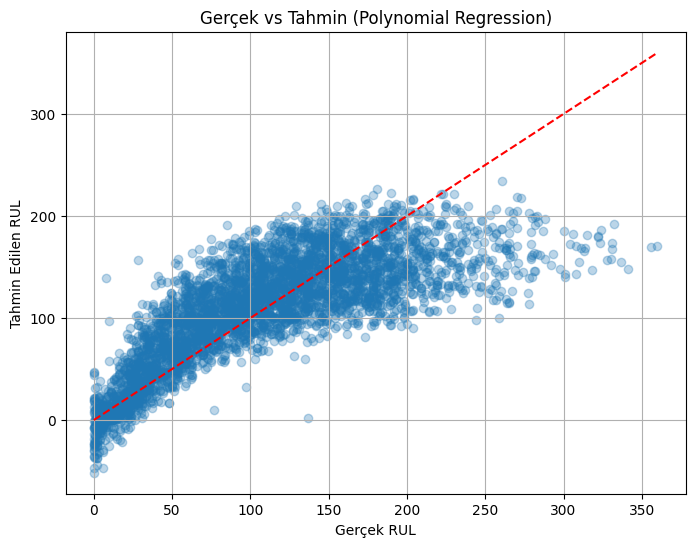

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Gerçek RUL")
plt.ylabel("Tahmin Edilen RUL")
plt.title("Gerçek vs Tahmin (Polynomial Regression)")
plt.grid(True)
plt.show()

In [18]:
# Giriş ve hedef ayır
X = dff.drop(columns=["RUL"])
y = dff["RUL"]

# Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: Scaler → Polynomial → Ridge
ridge_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2, include_bias=False),
    Ridge(alpha=1.0)  # alpha: regularization gücü
)

ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Skoru (Polynomial + Ridge): {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")

R2 Skoru (Polynomial + Ridge): 0.6201
MAE: 30.97
MSE: 1729.48
RMSE: 41.59


In [19]:
# Pipeline: Scaler → Polynomial → Ridge
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", Ridge())
])

# Aranacak alpha değerleri
param_grid = {
    "ridge__alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
}

# GridSearchCV ile en iyi modeli ara
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

# En iyi modeli al ve tahmin yap
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"En iyi alpha: {grid.best_params_['ridge__alpha']}")
print(f"R2 Skoru (Polynomial + Ridge + GridSearch): {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")

En iyi alpha: 100.0
R2 Skoru (Polynomial + Ridge + GridSearch): 0.6208
MAE: 30.93
MSE: 1726.37
RMSE: 41.55


In [20]:
# X ve y zaten hazır olmalı (ölçekleme gerekmez)
X = dff.drop(columns=["RUL"])
y = dff["RUL"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Skoru (Random Forest): {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")

R2 Skoru (Random Forest): 0.6313
MAE: 29.57
MSE: 1678.52
RMSE: 40.97


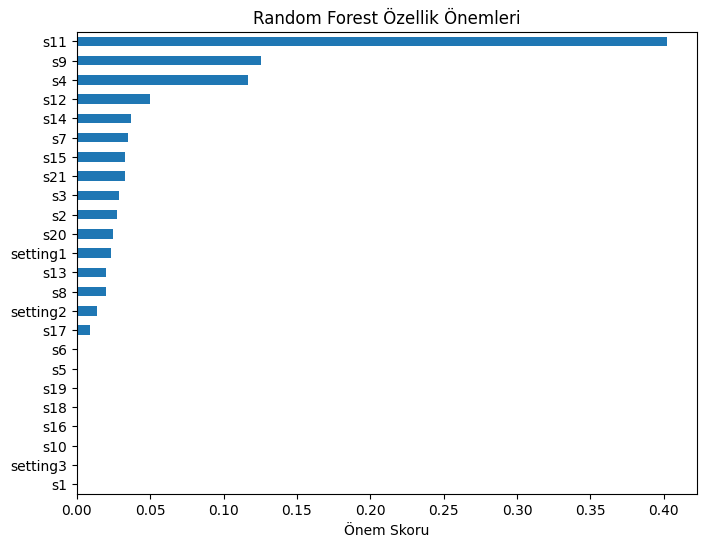

In [21]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Random Forest Özellik Önemleri")
plt.xlabel("Önem Skoru")
plt.show()

In [22]:
# id ve cycle dahil, veriyi tekrar tanımla
X = dff.drop(columns=["RUL"])
y = dff["RUL"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parametre ızgarası
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV
grid = GridSearchCV(RandomForestRegressor(random_state=42),
                    param_grid,
                    cv=3,
                    scoring='r2',
                    n_jobs=-1,
                    verbose=1)

grid.fit(X_train, y_train)

# En iyi modeli al ve tahmin yap
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"En iyi parametreler: {grid.best_params_}")
print(f"R2 Skoru (RF + GridSearch): {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

En iyi parametreler: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 200}
R2 Skoru (RF + GridSearch): 0.6415
MAE: 29.14
MSE: 1632.41
RMSE: 40.40


In [23]:
!pip install xgboost


In [24]:
# id ve cycle dahil (önce en yüksek potansiyeli deneyelim)
X = dff.drop(columns=["RUL"])
y = dff["RUL"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R2 Skoru (XGBoost - base): {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {mse**0.5:.2f}")

R2 Skoru (XGBoost - base): 0.5991
MAE: 30.67
MSE: 1825.52
RMSE: 42.73


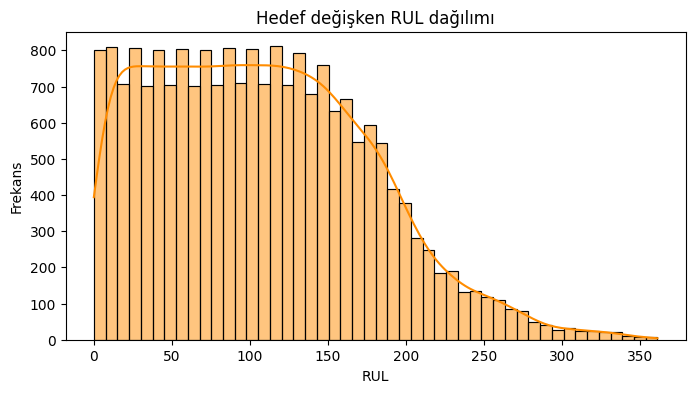

In [25]:
plt.figure(figsize=(8, 4))
sns.histplot(dff['RUL'], kde=True, color="darkorange")
plt.title('Hedef değişken RUL dağılımı')
plt.xlabel('RUL')
plt.ylabel('Frekans')
plt.show()

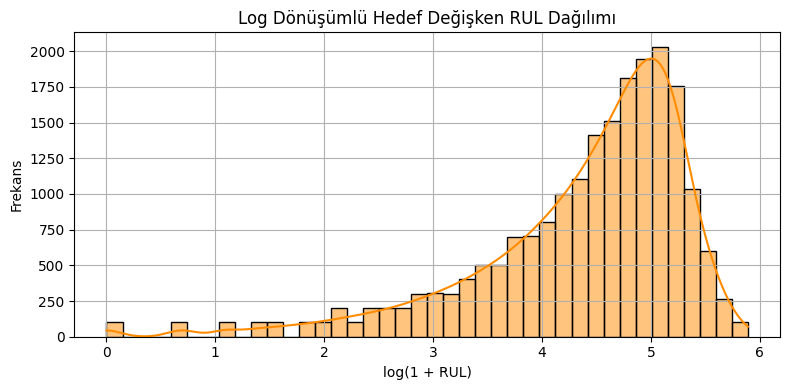

In [26]:
# Log dönüşümlü RUL
y_log = np.log1p(dff["RUL"])

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(y_log, bins=40, kde=True, color="darkorange")
plt.title("Log Dönüşümlü Hedef Değişken RUL Dağılımı")
plt.xlabel("log(1 + RUL)")
plt.ylabel("Frekans")
plt.grid(True)
plt.tight_layout()
plt.show()


In [27]:
dff.to_csv("dff_temiz.csv", index=False)


In [28]:
# Özellikler ve log dönüşümlü hedef
X = dff.drop(columns=["RUL"])
y = np.log1p(dff["RUL"])

# Train-test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parametre ızgarası
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [5],
    'max_features': ['sqrt']
}

# GridSearchCV ile model
grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

# Tahmin ve ters log dönüşüm
y_pred_log = grid.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# Değerlendirme
print("R2: Random Forest + GridSearch (log(RUL) dönüşümlü)", r2_score(y_test_real, y_pred))
print("MAE:", mean_absolute_error(y_test_real, y_pred))
print("RMSE:", mean_squared_error(y_test_real, y_pred))


R2: Random Forest + GridSearch (log(RUL) dönüşümlü) 0.6268791893614424
MAE: 28.864866459515508
RMSE: 1698.8326952337743


In [ ]:
# Log dönüşüm
X = dff.drop(columns=["RUL"])
y = np.log1p(dff["RUL"])

# Eğitim/test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline: ölçekleme → polinom → ridge
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", Ridge())
])

# GridSearch parametreleri
param_grid = {
    "ridge__alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
}

# GridSearch
grid = GridSearchCV(pipe, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

# Tahmin ve ters dönüşüm
y_pred_log = grid.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# Metrikler
print("R²: Polynomial + Ridge + GridSearch (log(RUL)) ", r2_score(y_test_real, y_pred))
print("MAE:", mean_absolute_error(y_test_real, y_pred))
print("RMSE:", mean_squared_error(y_test_real, y_pred))


In [30]:
X = dff.drop(columns=["RUL"])
y = np.log1p(dff["RUL"])  # log dönüşüm

# Train/test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parametre ızgarası
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearchCV
xgb = XGBRegressor(random_state=42, n_jobs=-1)
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Tahmin
y_pred_log = grid.best_estimator_.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# Metrikler
print("R²:XGBoost + GridSearch (log RUL dönüşümlü)", r2_score(y_test_real, y_pred))
print("MAE:", mean_absolute_error(y_test_real, y_pred))
print("RMSE:", mean_squared_error(y_test_real, y_pred))


R²:XGBoost + GridSearch (log RUL dönüşümlü) 0.6308801632926136
MAE: 28.735753435012406
RMSE: 1680.6161146163079


In [31]:
importances = rf.feature_importances_
features = X.columns

# Sıralayıp yazdır
importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_df)

     Feature    Importance
13       s11  4.022602e-01
11        s9  1.254206e-01
6         s4  1.168609e-01
14       s12  5.024239e-02
16       s14  3.691735e-02
9         s7  3.493846e-02
17       s15  3.320331e-02
23       s21  3.258723e-02
5         s3  2.857818e-02
4         s2  2.740288e-02
22       s20  2.441521e-02
0   setting1  2.348259e-02
15       s13  2.004655e-02
10        s8  1.982044e-02
1   setting2  1.376633e-02
19       s17  9.384174e-03
8         s6  6.732449e-04
7         s5  8.340596e-09
2   setting3  0.000000e+00
3         s1  0.000000e+00
12       s10  0.000000e+00
18       s16  0.000000e+00
21       s19  0.000000e+00
20       s18  0.000000e+00


/tmp/ipython-input-32-2475960011.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")


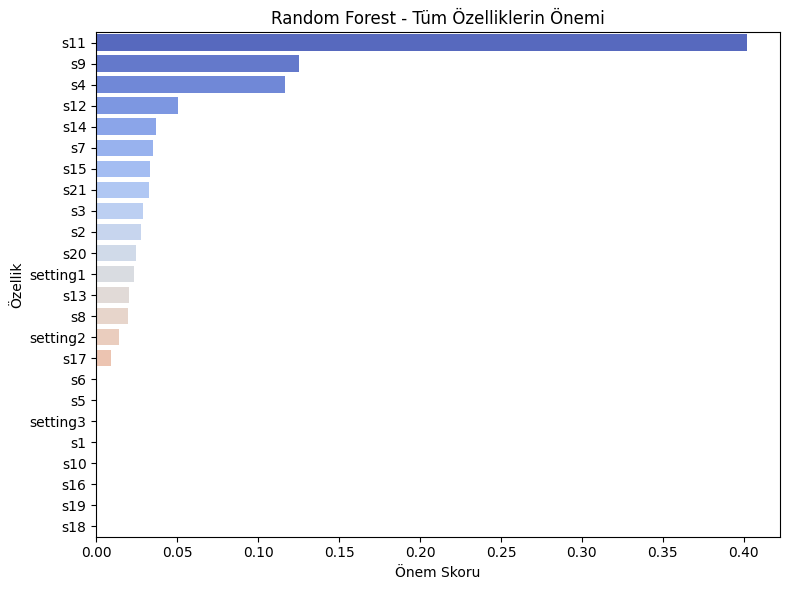

In [32]:
# Tüm özellikler için barplot
plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="coolwarm")

plt.title("Random Forest - Tüm Özelliklerin Önemi")
plt.xlabel("Önem Skoru")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()


In [33]:
X = dff.drop(columns=["RUL"])
y = np.log1p(dff["RUL"])

# Eğitim/test böl
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb.fit(X_train, y_train)

# Özellik önemlerini al
importances = xgb.feature_importances_
features = X.columns

# DataFrame'e dök
xgb_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Yazdır
print(xgb_importance_df)


     Feature  Importance
13       s11    0.591947
6         s4    0.104107
11        s9    0.066610
14       s12    0.053840
17       s15    0.027289
19       s17    0.025646
16       s14    0.022862
22       s20    0.021174
9         s7    0.017590
23       s21    0.014184
15       s13    0.012778
10        s8    0.011643
4         s2    0.010635
5         s3    0.008752
1   setting2    0.003788
0   setting1    0.003291
8         s6    0.003179
7         s5    0.000685
2   setting3    0.000000
3         s1    0.000000
12       s10    0.000000
18       s16    0.000000
21       s19    0.000000
20       s18    0.000000


In [34]:
df = pd.read_csv(file)
# Ortak etkisiz özellikler
remove_features = [
    's1', 's10', 's16',
    's18', 's19', 'setting3'
]
# Temizlenmiş veri çerçevesi
df_clean = df.drop(columns=remove_features)

print("Kalan özellikler:", list(df_clean.columns))

Kalan özellikler: ['id', 'cycle', 'setting1', 'setting2', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21', 'RUL']


In [35]:
# diff alacağımız sensörler
diff_cols = ['s2', 's3', 's4','s5','s6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']


# Farkları eklemek için tüm id'ler üzerinde sırayla işlem yap
for col in diff_cols:
    df_clean[f"{col}_diff"] = df_clean.groupby("id")[col].diff().fillna(0)


print(df_clean[[f"{col}_diff" for col in diff_cols]].head())


   s2_diff  s3_diff  s4_diff  s5_diff  s6_diff  s7_diff  s8_diff  s9_diff  \
0     0.00     0.00     0.00      0.0      0.0     0.00     0.00     0.00   
1     0.33     2.12     2.54      0.0      0.0    -0.61    -0.02    -2.12   
2     0.20    -3.83     1.06      0.0      0.0     0.51     0.04     8.87   
3     0.00    -5.20    -2.33      0.0      0.0     0.19     0.03    -3.46   
4     0.02     0.06     4.35      0.0      0.0    -0.45    -0.05     5.67   

   s11_diff  s12_diff  s13_diff  s14_diff  s15_diff  s17_diff  s20_diff  \
0      0.00      0.00      0.00      0.00    0.0000       0.0      0.00   
1      0.02      0.62      0.05     -7.13    0.0123       0.0     -0.06   
2     -0.22      0.14     -0.04      1.74   -0.0140      -2.0     -0.05   
3     -0.14      0.44      0.05      0.60   -0.0496       2.0     -0.07   
4      0.15     -0.67     -0.04     -0.03    0.0612       1.0      0.02   

   s21_diff  
0    0.0000  
1    0.0046  
2   -0.0794  
3    0.0297  
4    0.0305  


In [36]:
# Rolling işlem yapılacak sensörler
rolling_cols = ['s2', 's3', 's4','s5','s6', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15', 's17', 's20', 's21']

# 3 ve 5 cycle için rolling mean ve std hesapla
for col in rolling_cols:
    df_clean[f"{col}_mean3"] = df_clean.groupby("id")[col].rolling(window=3).mean().reset_index(0, drop=True)
    df_clean[f"{col}_std3"]  = df_clean.groupby("id")[col].rolling(window=3).std().reset_index(0, drop=True)
    df_clean[f"{col}_mean5"] = df_clean.groupby("id")[col].rolling(window=5).mean().reset_index(0, drop=True)
    df_clean[f"{col}_std5"]  = df_clean.groupby("id")[col].rolling(window=5).std().reset_index(0, drop=True)

# Eksik değerleri 0 ile doldur
df_clean.fillna(0, inplace=True)

# Kontrol
print(df_clean.filter(like="_mean3").head())


     s2_mean3     s3_mean3     s4_mean3  s5_mean3  s6_mean3    s7_mean3  \
0    0.000000     0.000000     0.000000      0.00      0.00    0.000000   
1    0.000000     0.000000     0.000000      0.00      0.00    0.000000   
2  642.106667  1589.836667  1402.646667     14.62     21.61  554.123333   
3  642.283333  1587.533333  1403.070000     14.62     21.61  554.153333   
4  642.356667  1584.543333  1404.096667     14.62     21.61  554.236667   

      s8_mean3     s9_mean3  s11_mean3  s12_mean3  s13_mean3    s14_mean3  \
0     0.000000     0.000000   0.000000       0.00       0.00     0.000000   
1     0.000000     0.000000   0.000000       0.00       0.00     0.000000   
2  2388.060000  9047.733333  47.410000     522.12    2388.04  8134.446667   
3  2388.076667  9048.830000  47.296667     522.52    2388.06  8132.850000   
4  2388.083333  9052.523333  47.226667     522.49    2388.05  8133.620000   

   s15_mean3   s17_mean3  s20_mean3  s21_mean3  
0   0.000000    0.000000   0.000000  

In [37]:
# Etkileşim oluşturulacak çiftler
interactions = [
    ("s11", "s4"),
    ("s11", "s9"),
    ("s7", "s9"),
    ("s14", "s12")
]

# Yeni özellikleri oluştur
for a, b in interactions:
    df_clean[f"{a}_div_{b}"] = df_clean[a] / (df_clean[b] + 1e-5)  # sıfıra bölmeyi engelle
    df_clean[f"{a}_mul_{b}"] = df_clean[a] * df_clean[b]


In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# Giriş ve hedef
X = df_clean.drop(columns=["id", "cycle", "RUL"])
y = df_clean["RUL"]

# İlk Random Forest modelini eğit
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature selection (importance threshold ayarlanabilir)
selector = SelectFromModel(rf, threshold="median", prefit=True)  # ya da 0.01 gibi özel değer verebilirsin
X_selected = selector.transform(X)

# Seçilen özellik isimleri
selected_features = X.columns[selector.get_support()]

print("Seçilen özellik sayısı:", X_selected.shape[1])
print("Seçilenler:", list(selected_features))


Seçilen özellik sayısı: 53
Seçilenler: ['s9', 's15', 's2_mean3', 's2_std3', 's2_mean5', 's2_std5', 's3_mean3', 's3_std3', 's3_mean5', 's3_std5', 's4_mean3', 's4_std3', 's4_mean5', 's4_std5', 's7_mean3', 's7_std3', 's7_mean5', 's7_std5', 's8_mean5', 's8_std5', 's9_mean3', 's9_std3', 's9_mean5', 's9_std5', 's11_mean3', 's11_std3', 's11_mean5', 's11_std5', 's12_mean3', 's12_std3', 's12_mean5', 's12_std5', 's13_mean3', 's13_mean5', 's13_std5', 's14_mean3', 's14_std3', 's14_mean5', 's14_std5', 's15_mean3', 's15_std3', 's15_mean5', 's15_std5', 's17_std5', 's20_mean5', 's20_std5', 's21_mean3', 's21_mean5', 's21_std5', 's11_mul_s4', 's11_mul_s9', 's7_div_s9', 's14_div_s12']


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [40]:
# Giriş ve hedef

y = df_clean["RUL"]

# Train/test böl
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Parametre ızgarası
param_grid = {
    'n_estimators': [200],
    'max_depth': [20],
    'min_samples_split': [5],
    'max_features': ['sqrt']
}

# Model ve GridSearch
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Tahmin
y_pred = grid.predict(X_test)

# Değerlendirme
print("R²:Random Forest + GridSearch", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R²:Random Forest + GridSearch 0.7262624900095968
MAE: 24.816111681803196
RMSE: 1246.33689310366


In [41]:
# Giriş ve log dönüşümlü hedef

y = np.log1p(df_clean["RUL"])

# Eğitim/test böl
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Parametre ızgarası
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# GridSearch + XGBoost
xgb = XGBRegressor(random_state=42, n_jobs=-1)
grid = GridSearchCV(xgb, param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)

# Tahmin ve ters dönüşüm
y_pred_log = grid.best_estimator_.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_real = np.expm1(y_test)

# Metrikler
print("R²:XGBoost + GridSearch (log RUL)", r2_score(y_test_real, y_pred))
print("MAE:", mean_absolute_error(y_test_real, y_pred))
print("RMSE:", mean_squared_error(y_test_real, y_pred))


R²:XGBoost + GridSearch (log RUL) 0.7261131699795844
MAE: 24.272980713168444
RMSE: 1247.0167526606872


In [42]:
# Giriş ve hedef

y = df_clean["RUL"]

# Eğitim/test böl
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Pipeline: Scaler → Polynomial → Ridge
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("poly", PolynomialFeatures(degree=2, include_bias=False)),
    ("ridge", Ridge())
])

# Ridge için alpha aralığı
param_grid = {
    "ridge__alpha": [0.01, 0.1, 1.0, 10.0, 100.0]
}

# GridSearch
grid = GridSearchCV(pipe, param_grid, cv=3, scoring="r2", n_jobs=-1)
grid.fit(X_train, y_train)

# Tahmin ve metrikler
y_pred = grid.predict(X_test)

print("R²:Polynomial + Ridge + GridSearch", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


R²:Polynomial + Ridge + GridSearch 0.6391746369619348
MAE: 30.367588039865957
RMSE: 1642.8510726850275


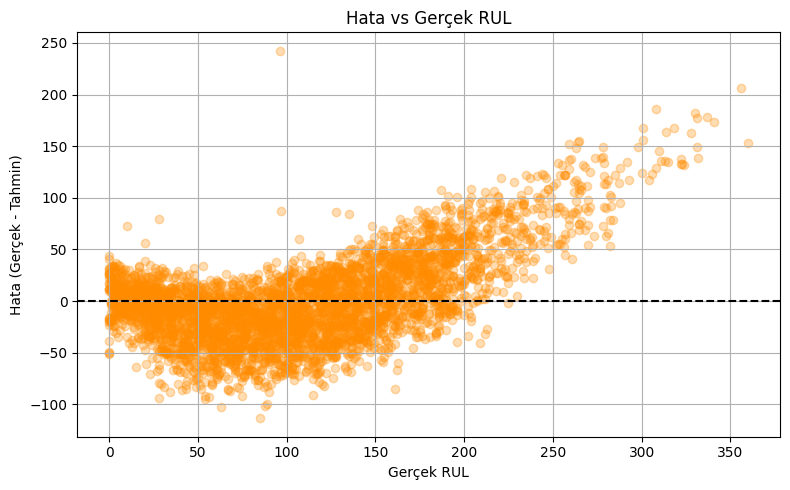

In [44]:
hatalar = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_test, hatalar, alpha=0.3, color="darkorange")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Gerçek RUL")
plt.ylabel("Hata (Gerçek - Tahmin)")
plt.title("Hata vs Gerçek RUL")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-45-1778963632.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=modeller, y=r2_list, palette="viridis")


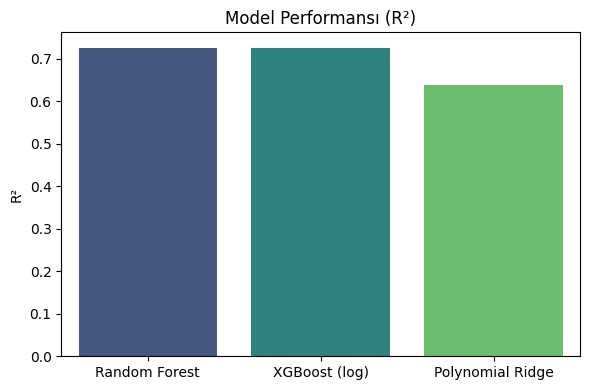

In [45]:
modeller = ["Random Forest", "XGBoost (log)", "Polynomial Ridge"]
r2_list = [0.7263, 0.7261, 0.6391 ]

plt.figure(figsize=(6, 4))
sns.barplot(x=modeller, y=r2_list, palette="viridis")
plt.title("Model Performansı (R²)")
plt.ylabel("R²")
plt.tight_layout()
plt.show()


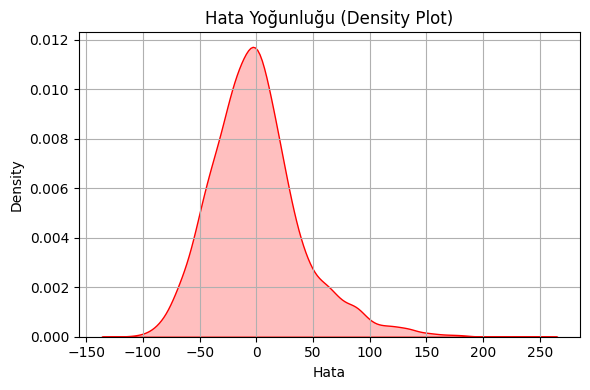

In [46]:
plt.figure(figsize=(6, 4))
sns.kdeplot(hatalar.astype(float), fill=True, color="red")
plt.title("Hata Yoğunluğu (Density Plot)")
plt.xlabel("Hata")
plt.grid(True)
plt.tight_layout()
plt.show()


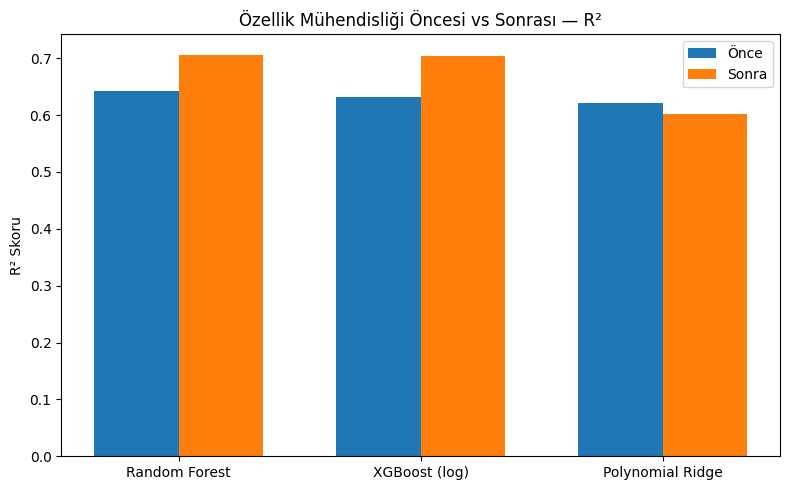

In [47]:
modeller = ["Random Forest", "XGBoost (log)", "Polynomial Ridge"]
r2_once = [0.6415, 0.6309, 0.6208]
r2_sonra = [0.7064, 0.7032, 0.6021]

x = np.arange(len(modeller))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, r2_once, width, label='Önce')
plt.bar(x + width/2, r2_sonra, width, label='Sonra')
plt.xticks(x, modeller)
plt.ylabel("R² Skoru")
plt.title("Özellik Mühendisliği Öncesi vs Sonrası — R²")
plt.legend()
plt.tight_layout()
plt.show()


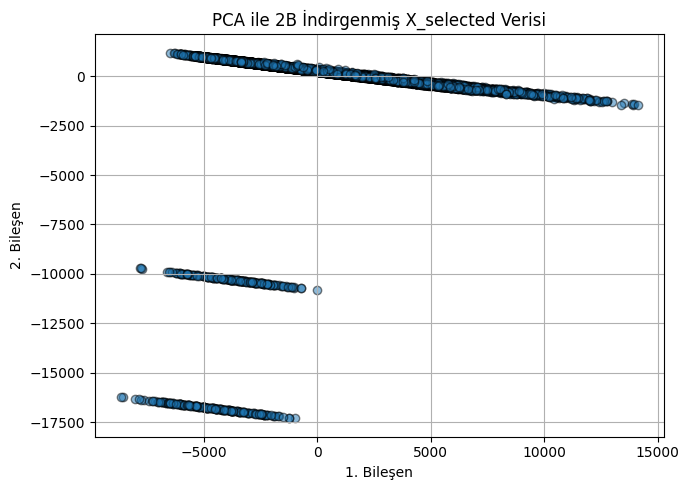

In [48]:
from sklearn.decomposition import PCA
# PCA ile 2 boyuta indir
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)

# Görselleştir
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, edgecolor='k')
plt.title("PCA ile 2B İndirgenmiş X_selected Verisi")
plt.xlabel("1. Bileşen")
plt.ylabel("2. Bileşen")
plt.grid(True)
plt.tight_layout()
plt.show()


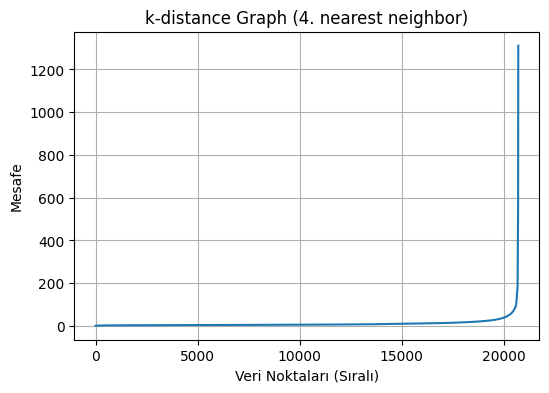

In [49]:
from sklearn.neighbors import NearestNeighbors
# En yakın 4 komşuya bak (min_samples=5 → 4 nearest neighbors + kendisi)
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(X_pca)
distances, indices = nbrs.kneighbors(X_pca)

# Her noktanın 4. en yakın komşusuna olan uzaklığı
k_distances = np.sort(distances[:, 4])

# Grafiği çiz
plt.figure(figsize=(6, 4))
plt.plot(k_distances)
plt.title("k-distance Graph (4. nearest neighbor)")
plt.xlabel("Veri Noktaları (Sıralı)")
plt.ylabel("Mesafe")
plt.grid(True)
plt.show()


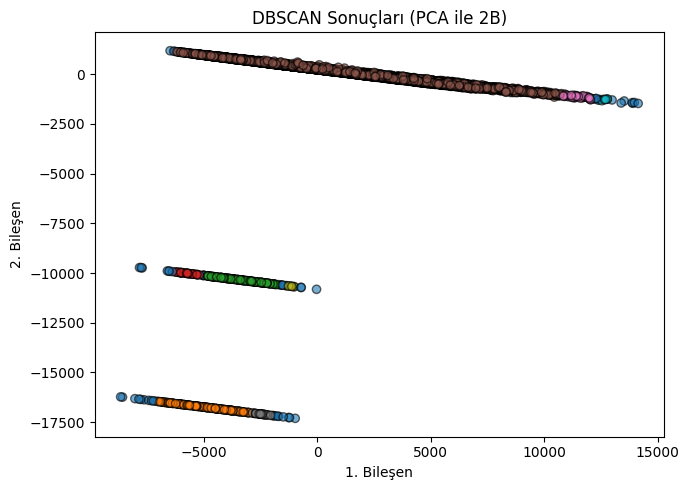

In [50]:
from sklearn.cluster import DBSCAN
# DBSCAN uygula
dbscan = DBSCAN(eps=130, min_samples=5)  # eps değeri PCA sonrası skala büyükse artır
labels = dbscan.fit_predict(X_pca)

# Görselleştir
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', edgecolor='k', alpha=0.6)
plt.title("DBSCAN Sonuçları (PCA ile 2B)")
plt.xlabel("1. Bileşen")
plt.ylabel("2. Bileşen")
plt.tight_layout()
plt.show()


In [51]:
# labels: DBSCAN'den gelen etiket dizisi
etiket_df = pd.Series(labels).value_counts().sort_index()
etiket_df.index = etiket_df.index.astype(str).str.replace("-1", "Anomali")
etiket_df.name = "Veri Sayısı"

print("Etiketlere Göre Satır Dağılımı:")
print(etiket_df)


Etiketlere Göre Satır Dağılımı:
Anomali       52
0            157
1            144
2             31
3          20260
4             43
5             24
6              6
7              6
Name: Veri Sayısı, dtype: int64


In [52]:
# Sadece en büyük küme (label == 3) ile devam et
mask_kume3 = labels == 3

X_clean = X_selected[mask_kume3]
y_clean = y[mask_kume3]

# Temizlenmiş veriyi train/test böl
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# GridSearch parametreleri (dilersen sadeleştirebilirsin)
param_grid = {
    'n_estimators': [300],
    'max_depth': [30],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Model + GridSearch
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

# Tahmin ve metrikler
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

print("En iyi parametreler:", grid.best_params_)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
En iyi parametreler: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
R²: 0.7116772651066989
MAE: 25.252871214381805
RMSE: 1338.4788292947787


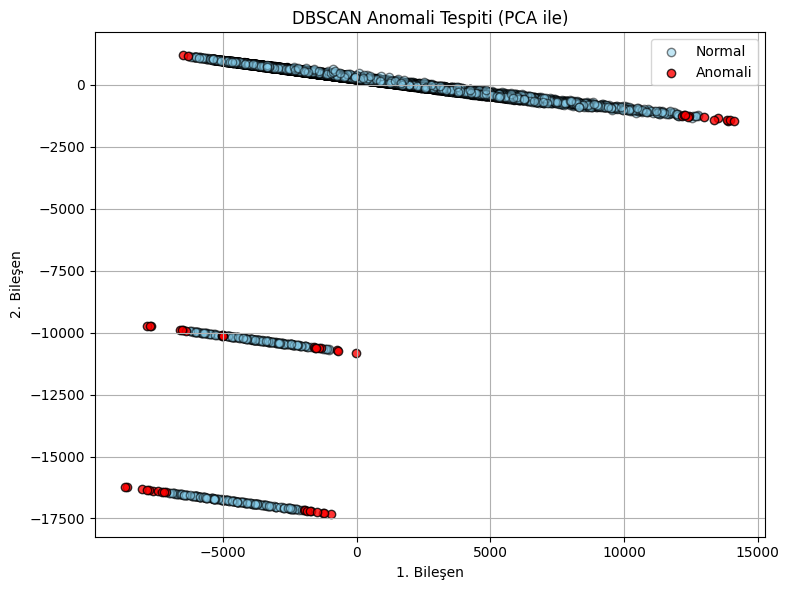

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Anomalileri ayıralım
normal_mask = labels != -1
anomali_mask = labels == -1

# PCA verisi: X_pca (2B), labels: DBSCAN etiketleri

plt.figure(figsize=(8, 6))
# Normal noktalar
plt.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1],
            c='skyblue', edgecolor='k', alpha=0.5, label='Normal')

# Anomaliler
plt.scatter(X_pca[anomali_mask, 0], X_pca[anomali_mask, 1],
            c='red', edgecolor='k', alpha=0.8, label='Anomali')

plt.title("DBSCAN Anomali Tespiti (PCA ile)")
plt.xlabel("1. Bileşen")
plt.ylabel("2. Bileşen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:
from sklearn.ensemble import IsolationForest

# Isolation Forest uygulama
iso = IsolationForest(contamination=0.01, random_state=42)  # %1 anomali varsayımı
iso_labels = iso.fit_predict(X_selected)

# Etiketler: -1 = anomali, 1 = normal


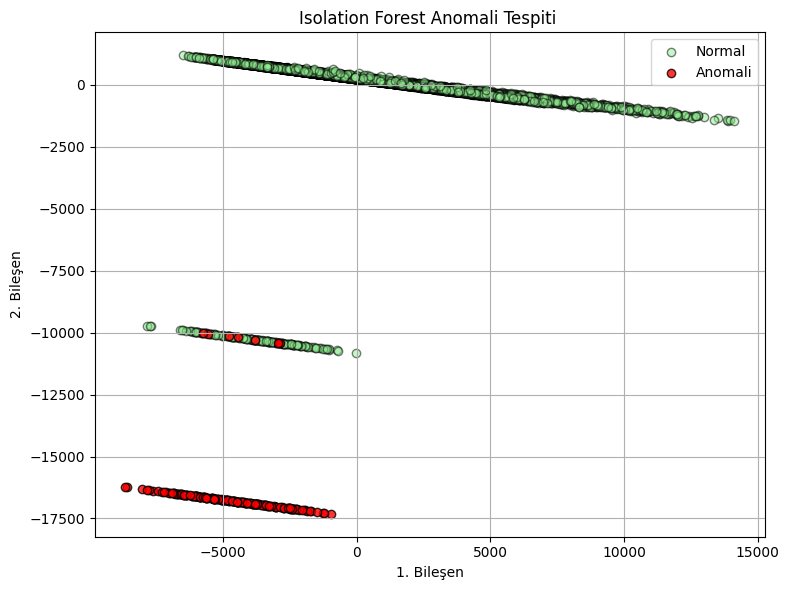

In [55]:
# PCA ile 2 boyuta indirgenmiş veri: X_pca
# iso_labels: -1 anomali, 1 normal

normal_mask = iso_labels == 1
anomali_mask = iso_labels == -1

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[normal_mask, 0], X_pca[normal_mask, 1],
            c='lightgreen', edgecolor='k', alpha=0.5, label='Normal')
plt.scatter(X_pca[anomali_mask, 0], X_pca[anomali_mask, 1],
            c='red', edgecolor='k', alpha=0.8, label='Anomali')
plt.title("Isolation Forest Anomali Tespiti ")
plt.xlabel("1. Bileşen")
plt.ylabel("2. Bileşen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
# Isolation Forest etiketleri: iso_labels (-1 = anomali, 1 = normal)

# Normal veriyi seç
mask_normal_if = iso_labels == 1
X_clean_if = X_selected[mask_normal_if]
y_clean_if = y[mask_normal_if]
# Train/Test böl
X_train, X_test, y_train, y_test = train_test_split(X_clean_if, y_clean_if, test_size=0.2, random_state=42)

# GridSearch parametreleri
param_grid = {
    'n_estimators': [300],
    'max_depth': [30],
    'min_samples_split': [5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt']
}

# Model ve GridSearch
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

# Tahmin ve metrikler
best_rf = grid.best_estimator_
y_pred = best_rf.predict(X_test)

print("En iyi parametreler:", grid.best_params_)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
En iyi parametreler: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
R²: 0.7140243654543164
MAE: 25.048782815682443
RMSE: 1303.0164776005827


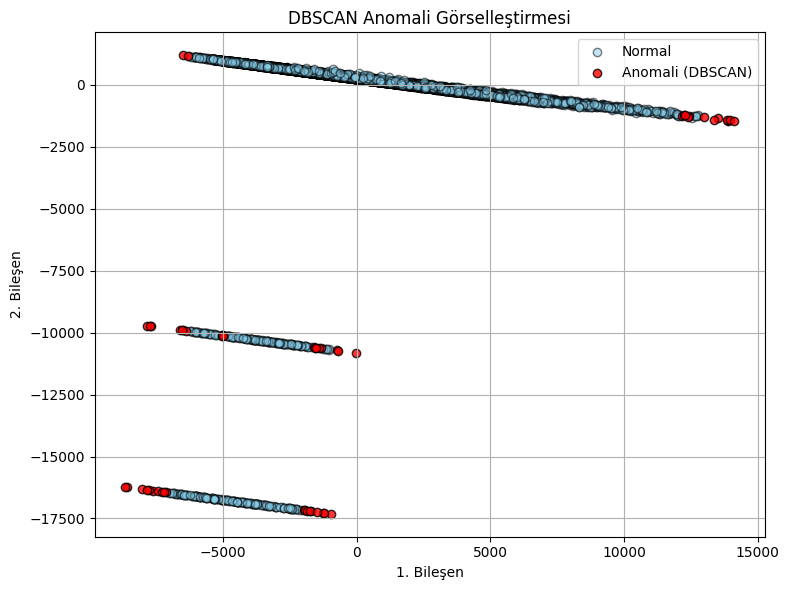

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[labels != -1, 0], X_pca[labels != -1, 1], c='skyblue', edgecolor='k', alpha=0.5, label='Normal')
plt.scatter(X_pca[labels == -1, 0], X_pca[labels == -1, 1], c='red', edgecolor='k', alpha=0.8, label='Anomali (DBSCAN)')
plt.title("DBSCAN Anomali Görselleştirmesi")
plt.xlabel("1. Bileşen")
plt.ylabel("2. Bileşen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


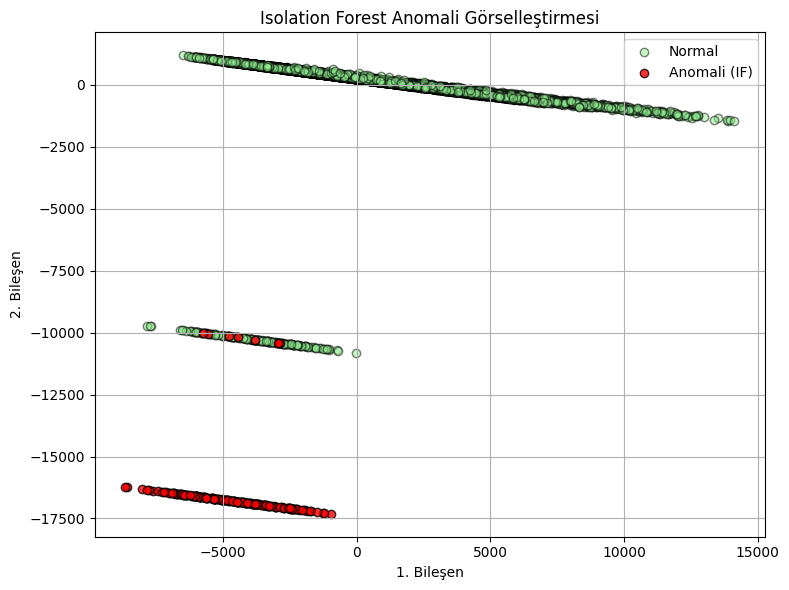

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[iso_labels == 1, 0], X_pca[iso_labels == 1, 1], c='lightgreen', edgecolor='k', alpha=0.5, label='Normal')
plt.scatter(X_pca[iso_labels == -1, 0], X_pca[iso_labels == -1, 1], c='red', edgecolor='k', alpha=0.8, label='Anomali (IF)')
plt.title("Isolation Forest Anomali Görselleştirmesi")
plt.xlabel("1. Bileşen")
plt.ylabel("2. Bileşen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-59-3336824432.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Yöntem", y="Anomali Sayısı", data=anomaly_counts, palette="pastel")


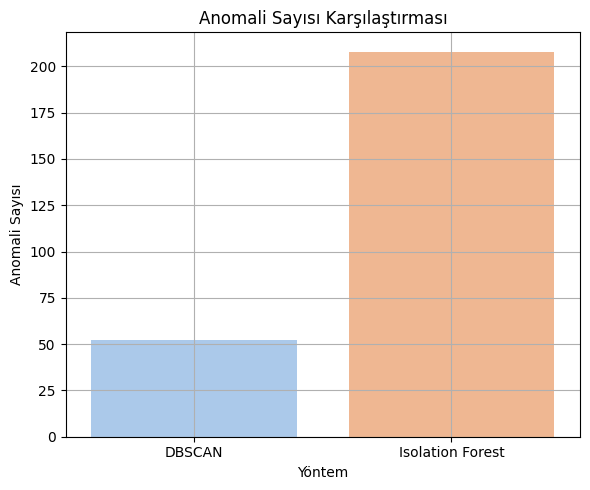

In [59]:
anomaly_counts = pd.DataFrame({
    "Yöntem": ["DBSCAN", "Isolation Forest"],
    "Anomali Sayısı": [sum(labels == -1), sum(iso_labels == -1)]
})

plt.figure(figsize=(6, 5))
sns.barplot(x="Yöntem", y="Anomali Sayısı", data=anomaly_counts, palette="pastel")
plt.title("Anomali Sayısı Karşılaştırması")
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-60-796623130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=r2_scores, palette="viridis")


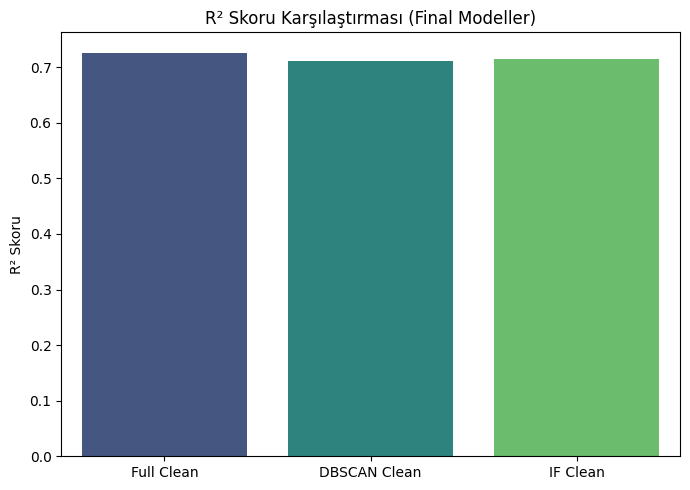

In [60]:
model_names = ["Full Clean", "DBSCAN Clean", "IF Clean"]
r2_scores = [0.7263, 0.7117, 0.7142]

plt.figure(figsize=(7, 5))
sns.barplot(x=model_names, y=r2_scores, palette="viridis")
plt.title("R² Skoru Karşılaştırması (Final Modeller)")
plt.ylabel("R² Skoru")

plt.tight_layout()
plt.show()
